In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = pd.read_csv(r"C:\Users\Loges\Downloads\Datasets\ChurnData.csv")
data

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [5]:
data.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

<Axes: >

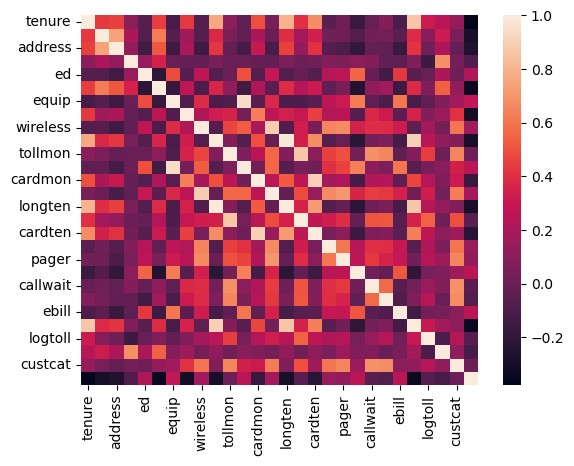

In [7]:
sns.heatmap(data.corr())

In [8]:
target = data['churn']
target

0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
195    0.0
196    0.0
197    0.0
198    1.0
199    0.0
Name: churn, Length: 200, dtype: float64

In [9]:
predictors = data.drop(['churn'], axis=1)
predictors

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0


In [10]:
x_tr, x_te, y_tr, y_te = train_test_split(predictors, target, test_size=0.2, random_state=123)
x_tr

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
24,53.0,22.0,1.0,25.0,4.0,0.0,1.0,1.0,0.0,12.05,...,0.0,0.0,1.0,0.0,0.0,1.0,2.489,3.240,3.219,2.0
150,5.0,43.0,16.0,72.0,3.0,17.0,0.0,1.0,0.0,5.55,...,0.0,0.0,0.0,1.0,1.0,0.0,1.714,2.757,4.277,3.0
114,9.0,24.0,3.0,26.0,4.0,1.0,1.0,0.0,0.0,7.65,...,0.0,0.0,0.0,0.0,0.0,0.0,2.035,3.240,3.258,1.0
33,33.0,54.0,18.0,57.0,4.0,4.0,1.0,0.0,0.0,7.50,...,0.0,0.0,1.0,1.0,0.0,0.0,2.015,3.409,4.043,3.0
23,3.0,37.0,13.0,24.0,1.0,3.0,0.0,0.0,0.0,2.00,...,1.0,0.0,0.0,0.0,1.0,1.0,0.693,3.240,3.178,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,52.0,61.0,3.0,53.0,5.0,1.0,1.0,1.0,1.0,12.25,...,1.0,0.0,1.0,0.0,1.0,1.0,2.506,3.240,3.970,2.0
98,62.0,76.0,20.0,35.0,3.0,18.0,0.0,1.0,0.0,17.25,...,0.0,0.0,0.0,0.0,0.0,1.0,2.848,3.240,3.555,2.0
66,37.0,76.0,38.0,117.0,4.0,21.0,0.0,1.0,0.0,7.50,...,0.0,0.0,0.0,0.0,0.0,0.0,2.015,3.240,4.762,1.0
126,67.0,40.0,14.0,59.0,3.0,11.0,0.0,1.0,0.0,27.00,...,0.0,0.0,0.0,1.0,1.0,0.0,3.296,3.401,4.078,3.0


In [15]:
input_scaler = StandardScaler()
input_scaler.fit(predictors)
predictors = input_scaler.transform(predictors)
predictors

array([[-1.13518441, -0.62595491, -0.4588971 , ..., -0.69987184,
         1.28150384,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, ...,  0.03858151,
        -0.60481397, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , ...,  0.03858151,
        -0.73269992,  0.48758163],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -0.21827183,
        -0.13456666,  0.48758163],
       [-0.53296457, -0.85594447, -1.14970993, ...,  2.27177859,
        -0.97515038,  1.41630855],
       [ 1.18104577,  0.67731925,  0.42929083, ...,  0.03858151,
         1.72644039, -0.44114529]])

In [16]:
x_tr2, x_te2, y_tr2, y_te2 = train_test_split(predictors, target, random_state=123, test_size=0.2)
y_tr2

24     0.0
150    0.0
114    0.0
33     1.0
23     0.0
      ... 
17     0.0
98     0.0
66     0.0
126    0.0
109    0.0
Name: churn, Length: 160, dtype: float64

In [11]:
model=LogisticRegression()
model.fit(x_tr, y_tr)

C:\Users\Loges\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred=model.predict(x_te)
print("Accuracy:", accuracy_score(y_te, y_pred))
print("Classification Report:\n", classification_report(y_te, y_pred))

Accuracy: 0.775
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.85        29
         1.0       0.60      0.55      0.57        11

    accuracy                           0.78        40
   macro avg       0.72      0.70      0.71        40
weighted avg       0.77      0.78      0.77        40



<Axes: >

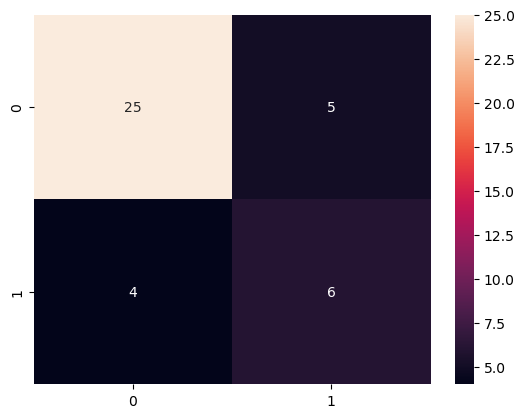

In [22]:
sns.heatmap(confusion_matrix(y_pred, y_te), annot=True)

In [17]:
scaled_model = LogisticRegression()
scaled_model.fit(x_tr2, y_tr2)

LogisticRegression()

In [18]:
y_pred2 = scaled_model.predict(x_te2)
print("Accuracy:", accuracy_score(y_te2, y_pred2))
print("Classification Report:\n", classification_report(y_te2, y_pred2))

Accuracy: 0.725
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.90      0.83        29
         1.0       0.50      0.27      0.35        11

    accuracy                           0.73        40
   macro avg       0.63      0.58      0.59        40
weighted avg       0.69      0.72      0.70        40



<Axes: >

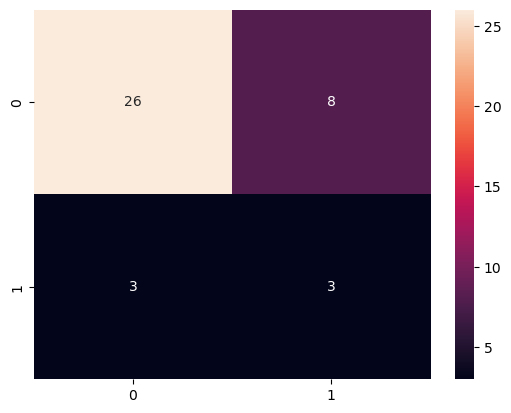

In [20]:
sns.heatmap(confusion_matrix(y_pred2, y_te2), annot=True)